# Energy Usage

### Import Datasets

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
elec_usage_data = pd.read_csv("pc_data.csv")

In [2]:
elec_usage_data.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Region,Age
0,50,67,25,0.86,1,3,North,25
1,45,78,47,0.94,0,1,Center,13
2,47,71,33,0.91,0,2,Center,20
3,42,73,54,0.94,0,1,Center,18
4,36,65,32,0.94,0,2,North,21


In [3]:
elec_usage_data.shape #n_samples=150, n_features=2

(1000, 8)

### Check for Duplicates

In [4]:
elec_usage_data[elec_usage_data.duplicated()]

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Region,Age


There is no duplicated Data

### Check for Missing Values

In [5]:
#check for missing values
temp = pd.DataFrame(elec_usage_data.isnull().sum())
temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(temp.index[temp['Sum'] > 0])) )

Amount of rows with missing values: 0


No missing Values

### Convert categorical to numerical

In [6]:
#elec_usage_data  = elec_usage_data.merge(region_df, left_index=True)
elec_usage_data = pd.get_dummies(elec_usage_data) 
elec_usage_data.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South
0,50,67,25,0.86,1,3,25,0,1,0
1,45,78,47,0.94,0,1,13,1,0,0
2,47,71,33,0.91,0,2,20,1,0,0
3,42,73,54,0.94,0,1,18,1,0,0
4,36,65,32,0.94,0,2,21,0,1,0


### Create new variables

Two new variables will be added:
a) Total EPC
b) Averange EPC

In [7]:
elec_usage_data['Average EPC'] = round(elec_usage_data[["EPC1","EPC2", "EPC3"]].mean(axis=1), 1)
elec_usage_data['Total EPC'] = elec_usage_data[["EPC1","EPC2", "EPC3"]].sum(axis=1)
elec_usage_data['Min EPC'] = elec_usage_data[["EPC1","EPC2", "EPC3"]].min(axis=1)
elec_usage_data['Max EPC'] = elec_usage_data[["EPC1","EPC2", "EPC3"]].max(axis=1)
elec_usage_data

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC,Min EPC,Max EPC
0,50,67,25,0.86,1,3,25,0,1,0,47.3,142,25,67
1,45,78,47,0.94,0,1,13,1,0,0,56.7,170,45,78
2,47,71,33,0.91,0,2,20,1,0,0,50.3,151,33,71
3,42,73,54,0.94,0,1,18,1,0,0,56.3,169,42,73
4,36,65,32,0.94,0,2,21,0,1,0,44.3,133,32,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,61,30,0.71,0,2,32,0,1,0,43.3,130,30,61
996,39,62,37,0.72,0,1,45,0,0,1,46.0,138,37,62
997,39,62,30,0.73,0,1,29,0,1,0,43.7,131,30,62
998,40,61,40,0.75,0,1,32,0,0,1,47.0,141,40,61


In [8]:
elec_usage_data.apply(lambda s: elec_usage_data.corrwith(s))

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC,Min EPC,Max EPC
EPC1,1.000000,-0.188828,0.681828,0.459152,-0.218100,0.025520,-0.057485,0.078595,-0.145914,0.083961,0.587361,0.587394,0.738574,-0.130985
EPC2,-0.188828,1.000000,-0.298256,-0.019484,-0.235279,-0.600315,0.215872,-0.015619,-0.012884,0.029619,0.606105,0.606105,-0.325802,0.991108
EPC3,0.681828,-0.298256,1.000000,0.441067,-0.187466,0.069052,-0.019076,0.104616,-0.179352,0.095317,0.522613,0.522595,0.981094,-0.284692
Usage,0.459152,-0.019484,0.441067,1.000000,-0.452627,-0.331674,-0.183069,0.233438,-0.452123,0.270093,0.388406,0.388337,0.448105,-0.001822
Payment,-0.218100,-0.235279,-0.187466,-0.452627,1.000000,0.425187,0.043617,-0.117452,0.193178,-0.097968,-0.376582,-0.376564,-0.181995,-0.247773
Calls,0.025520,-0.600315,0.069052,-0.331674,0.425187,1.000000,-0.165043,-0.112714,0.199114,-0.109196,-0.453819,-0.453816,0.092022,-0.599448
Age,-0.057485,0.215872,-0.019076,-0.183069,0.043617,-0.165043,1.000000,0.020639,-0.007467,-0.012059,0.146397,0.146245,-0.038541,0.206133
Region_Center,0.078595,-0.015619,0.104616,0.233438,-0.117452,-0.112714,0.020639,1.000000,-0.547314,-0.379205,0.070640,0.070577,0.098656,-0.014345
Region_North,-0.145914,-0.012884,-0.179352,-0.452123,0.193178,0.199114,-0.007467,-0.547314,1.000000,-0.566875,-0.158596,-0.158481,-0.166071,-0.019570
Region_South,0.083961,0.029619,0.095317,0.270093,-0.097968,-0.109196,-0.012059,-0.379205,-0.566875,1.000000,0.105812,0.105748,0.086500,0.035757


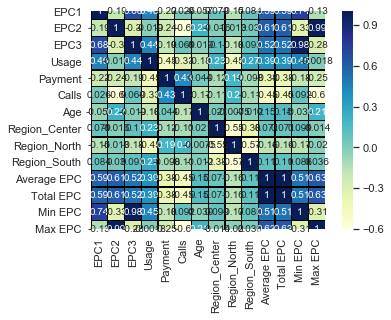

In [9]:
corrmat = elec_usage_data.corr()
sns.heatmap(corrmat, linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

### Strong Correlations:
     · Total EPC with Payments and Calls (-)
     · Regions with other regions (-)
     · Payment with Usage and EPC (-)
     · Calls with EPC2 (-)
     · Age more (+) correlated with EPC2 and (-) with EPC1 and EPC3
     · Usage with EPC (+)
     · 
     
    

## PCA

### Scaling

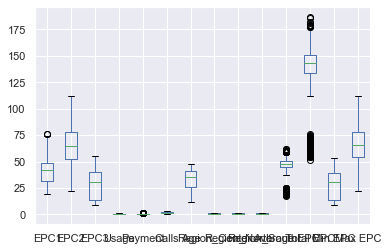

In [10]:
import numpy as np
elec_usage_data.boxplot()

a) scaling method 1: StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
#normalize the dataset
scaler = StandardScaler()
elec_usage_data_scaled = scaler.fit_transform(elec_usage_data)

In [12]:
elec_usage_data_scaled

array([[ 0.83458251, -0.01936493, -0.29963103, ...,  0.17838673,
        -0.26086891, -0.05025699],
       [ 0.38535089,  0.46808179,  1.34792776, ...,  1.20803595,
         1.34151997,  0.44510759],
       [ 0.56504353,  0.15788842,  0.29948126, ...,  0.50934541,
         0.38008664,  0.12987558],
       ...,
       [-0.15372706, -0.24093162,  0.07481415, ..., -0.22611832,
         0.13972831, -0.2754227 ],
       [-0.06388074, -0.28524496,  0.82370451, ...,  0.14161354,
         0.94092275, -0.32045585],
       [-0.06388074, -0.24093162,  0.97348258, ...,  0.2519331 ,
         0.94092275, -0.2754227 ]])

In [13]:
elec_usage_data_scaled_df = pd.DataFrame(elec_usage_data_scaled)
elec_usage_data_scaled_df.columns = elec_usage_data.columns

elec_usage_data_scaled_df.head()

,EPC1,EPC2,EPC3,Usage,Payment,Calls,Age,Region_Center,Region_North,Region_South,Average EPC,Total EPC,Min EPC,Max EPC
0,0.834583,-0.019365,-0.299631,0.838198,2.859075,1.958966,-0.843981,-0.605079,1.105542,-0.626704,0.174825,0.178387,-0.260869,-0.050257
1,0.385351,0.468082,1.347928,1.131057,-0.349763,-0.260825,-2.066994,1.652678,-0.904534,-0.626704,1.211771,1.208036,1.341520,0.445108
2,0.565044,0.157888,0.299481,1.021235,-0.349763,0.849070,-1.353570,1.652678,-0.904534,-0.626704,0.505765,0.509345,0.380087,0.129876
3,0.115812,0.246515,1.872151,1.131057,-0.349763,-0.260825,-1.557405,1.652678,-0.904534,-0.626704,1.167646,1.171263,1.101162,0.219942
4,-0.423266,-0.107992,0.224592,1.131057,-0.349763,0.849070,-1.251652,-0.605079,1.105542,-0.626704,-0.156116,-0.152572,0.299967,-0.140323


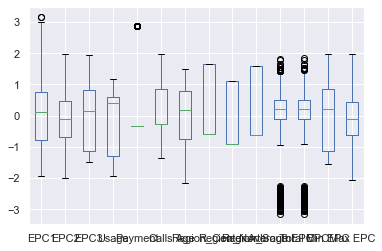

In [14]:
elec_usage_data_scaled_df.boxplot()

##### Results: We have 3 different datasets to be tested: 
###### a) "elec_usage_data" - Not scaled dataset  (We will apply PCA only in the scaled datasets)
###### b) "elec_usage_data_scaled_df" - StandardScaler dataset
###### c) "elec_usage_data_scaled_df2" - MinmaxScaler dataset

### PCA fit

b)

In [16]:
import matplotlib.pyplot as plt

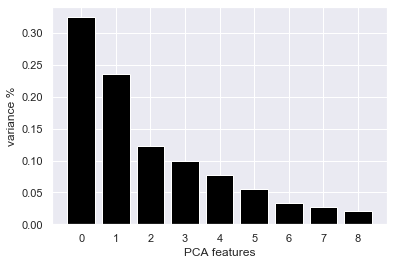

In [17]:
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(elec_usage_data_scaled_df)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

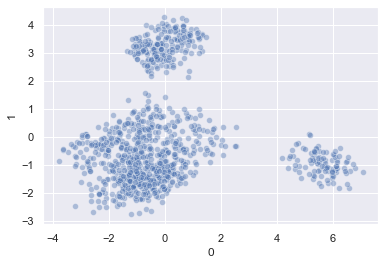

In [18]:
p1=sns.scatterplot(x=PCA_components[0], y=PCA_components[1],
              alpha=.4, 
              data=PCA_components)

c)

In [19]:
# save both PCA's
#df2_pca.to_csv(r'/Users/mireia/Downloads\PCA1.csv', index = True)

from IPython.display import HTML
import base64   

def create_download_link( df, title = "Download CSV file", filename = "PCA1.csv"):  
    csv = df2_pca.to_csv(index =True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df2_pca)

#### *************************************************************************************************************###########################################################################################################333

### K-means

In [20]:
PCA_components.iloc[:,:2]

,0,1
0,1.075381,-0.913065
1,-2.795723,-0.978194
2,-1.246832,-0.920305
3,-2.691736,-1.146754
4,0.320409,-0.696039
...,...,...
995,0.699824,-0.550779
996,-0.834465,-0.544361
997,0.368175,-0.218256
998,-1.050261,-0.982767


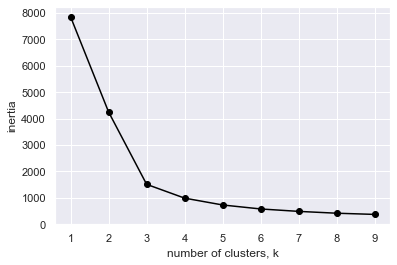

In [23]:
from sklearn import metrics
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score 

km = KMeans(n_clusters=3, 
            init='k-means++',  #init=’k-means++’ 
            n_init=10, 
            max_iter=300, 
            tol=1e-04, 
            random_state=0) #init=’k-means++’ see notes below

km.fit(PCA_components.iloc[:,:2]) #Compute k-means clustering.
y_km = km.predict(PCA_components.iloc[:,:2]) #Predict the closest cluster each sample in X belongs to.

In [25]:
y_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

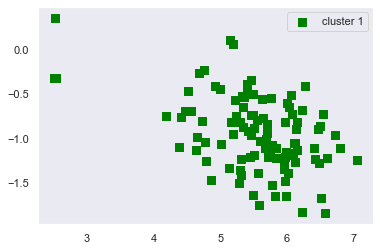

In [26]:
plt.scatter(PCA_components.iloc[:,:2].iloc[y_km==0,0],
            PCA_components.iloc[:,:2].iloc[y_km==0,1],
            s=50, c='green',
            marker='s',
            label='cluster 1')

plt.legend()
plt.grid()
plt.show()

Distortion: 1511.33


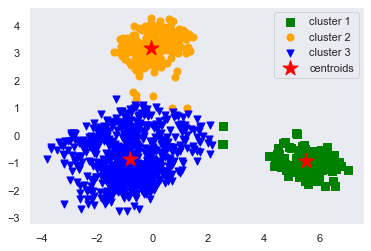

In [27]:
print("Distortion: %.2f" % km.inertia_)
plt.scatter(PCA_components.iloc[:,:2].iloc[y_km==0,0],PCA_components.iloc[:,:2].iloc[y_km==0,1],s=50,c='green',marker='s',label='cluster 1')
plt.scatter(PCA_components.iloc[:,:2].iloc[y_km==1,0],PCA_components.iloc[:,:2].iloc[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(PCA_components.iloc[:,:2].iloc[y_km==2,0],PCA_components.iloc[:,:2].iloc[y_km==2,1],s=50,c='blue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [28]:
def silh(silhouette_val,y): 
    y_ax_lower, y_ax_upper=0,0

    for i in np.unique(y):
        c_silhouette_vals = silhouette_vals[y_km==i]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red',linestyle='--')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6206617012381151


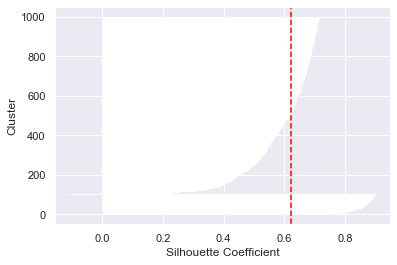

For n_clusters = 3 The average silhouette_score is : 0.640412931815349


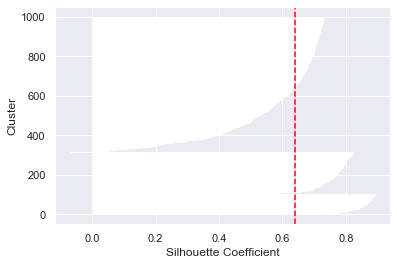

For n_clusters = 4 The average silhouette_score is : 0.47420678945632366


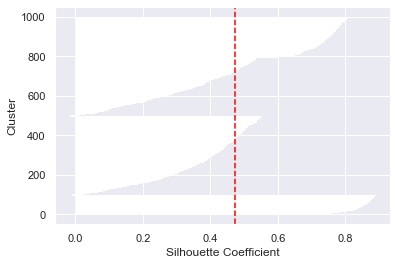

For n_clusters = 5 The average silhouette_score is : 0.4849963373555734


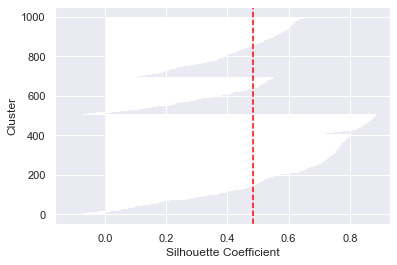

For n_clusters = 6 The average silhouette_score is : 0.49244315471516664


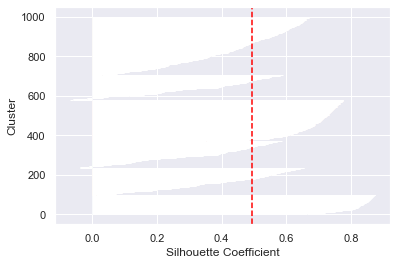

For n_clusters = 7 The average silhouette_score is : 0.4810767343601517


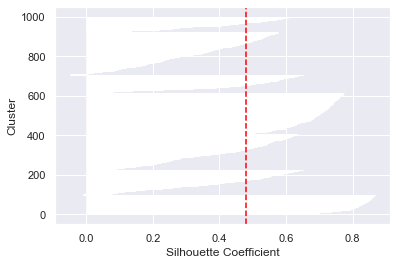

For n_clusters = 8 The average silhouette_score is : 0.4366603373442397


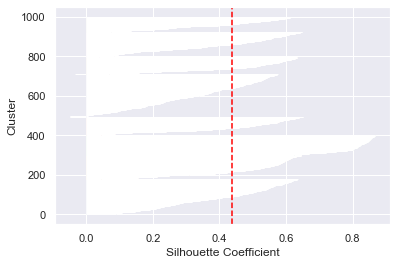

In [29]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:  
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    km = KMeans(n_clusters=n_clusters, init ='k-means++',n_init=10,max_iter=300,random_state=0)
    y_km = km.fit_predict(PCA_components.iloc[:,:2])
    
    cluster_labels = np.unique(y_km)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_components.iloc[:,:2], y_km)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    silhouette_vals = silhouette_samples(PCA_components.iloc[:,:2],y_km,metric='euclidean')
    
    silh(silhouette_vals,y_km)